# Bayesian Statistics 

# Final Exam: Individual Project

In [1]:
import numpy as np
import pandas as pd
#pip install --upgrade arviz pytensor scikit-learn
#!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.stats import poisson

C:\Users\Anahit Petrosyan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 1. Data Description and Understanding

The marketing company wants to predict the number of clicks on an ad per day.
It is well known that the number of clicks in the period is described by Poisson distribution. 

Use the following prior: Gamma $(k =10, \theta =2$)
For the grid approach choose 10 possible values of parameter.

The company calculated the number of clicks during the 21 days to make predictions. The data is presented in the table below.

In [2]:
samples= pd.DataFrame(columns = ['Data'],
                   data = [20,26,22,23,18, 15, 17, 21, 12,12,23, 19,26,22,13,27,24, 15, 20, 14, 23])
samples

,Data
0,20
1,26
2,22
3,23
4,18
5,15
6,17
7,21
8,12
9,12


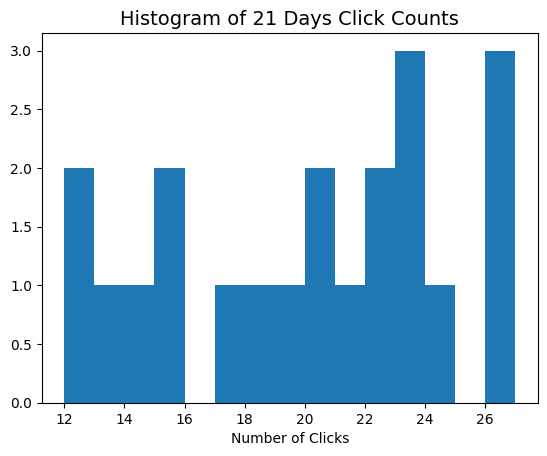

In [3]:
data = [20, 26, 22, 23, 18, 15, 17, 21, 12, 12, 23, 19, 26, 22, 13, 27, 24, 15, 20, 14, 23]
plt.hist(data, bins=range(min(data), max(data) + 1))
plt.title('Histogram of 21 Days Click Counts', fontsize=14)
plt.xlabel('Number of Clicks')
plt.grid(False)
plt.show()

Bayesian statistics at its most basic level is an approach to statistical problems that seeks to
combine information from two sources: the information we believes at the start of the research
process (called the **prior**) and the information contained in the data (called the **likelihood**). The main goal
of a typical Bayesian statistical analysis is to obtain the posterior distribution of model parameters.

# 2. Choosing the Prior Distribution

In [4]:
# parameters
alpha_prior = 10
beta_prior = 0.5
k = 10
theta = 2

$$
\text{Prior distribution: Gamma}(\alpha, \beta) \\
P(\lambda) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}
$$

where:
  * $\alpha$ (shape parameter) = $k$ = {{k}}
  * $\beta$ (rate parameter) = $\theta$ = {{theta}}
$$
\text{Mean of Gamma prior:} E[\lambda] = \frac{\alpha}{\beta} = \frac{{k}}{{\theta}}
$$



**Given:**

* Shape parameter: $k = 10$
* Rate parameter: $\theta = 2$

**Prior Distribution:**

The Gamma prior distribution $\pi(\lambda)$ is given by:

$$\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}$$

Substituting $\alpha = 10$ and $\beta = 0.5$ (since $\beta = \frac{1}{\theta} = \frac{1}{2} = 0.5$), we get:

$$\pi(\lambda) = \frac{0.5^{10}}{\Gamma(10)} \lambda^{9} e^{-0.5 \lambda}$$

**Prior Expectation:**

The expectation (mean) of a Gamma distribution with parameters $\alpha = k$ and $\beta = \theta$ is:

$$E[\lambda] = \frac{\alpha}{\beta}$$

For our prior distribution:

$$E[\lambda] = \frac{10}{0.5} = 20$$



Prior distribution: Gamma distribution with α=10 and β=0.5

Prior mean: 20

Prior variance: 40

# 3. Likelihood Function

**Likelihood:**

Given that our data $X_1, X_2, \ldots, X_n$ are independent and identically distributed (iid) Poisson random variables with parameter $\lambda$, the likelihood function $L(\lambda \mid \mathbf{x})$ is:

\begin{equation}
L(\lambda \mid \mathbf{x}) = \prod_{i=1}^{n} \frac{e^{-\lambda} \lambda^{x_i}}{x_i!} = \prod_{i=1}^{n} \frac{e^{-\lambda} \lambda^{x_i}}{x_i!}
\end{equation}

where:

* $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ represents the observed data.
* $x_i$ is the number of clicks observed on day $i$.

**Posterior:**

The posterior distribution $\pi(\lambda \mid \mathbf{x})$ is proportional to the product of the likelihood and the prior:

\begin{equation}
\pi(\lambda \mid \mathbf{x}) \propto L(\lambda \mid \mathbf{x}) \cdot \pi(\lambda)
\end{equation}

Substituting the Poisson likelihood and the Gamma prior:

\begin{equation}
\pi(\lambda \mid \mathbf{x}) \propto \lambda^{\sum_{i=1}^{n} x_i} e^{-n\lambda} \cdot \lambda^{\alpha - 1} e^{-\beta \lambda}
\end{equation}

Simplifying gives:

\begin{equation}
\pi(\lambda \mid \mathbf{x}) \propto \lambda^{\left(\sum_{i=1}^{n} x_i + \alpha - 1\right)} e^{-(n + \beta)\lambda}
\end{equation}



# 4. Posterior Distribution

**Posterior Distribution:**


* Shape parameter: $\alpha' = \alpha + \sum_{i=1}^{n} x_i$
* Rate parameter: $\beta' = n + \beta$

Therefore, the posterior distribution $\pi(\lambda \mid \mathbf{x})$ is Gamma distributed with parameters $\alpha'$ and $\beta'$:

\begin{equation}
\pi(\lambda \mid \mathbf{x}) = \text{Gamma}(\alpha + \sum_{i=1}^{n} x_i, n + \beta)
\end{equation}


## 4.2 Greed approach

In [7]:
prior = gamma(alpha_prior, scale=1/beta_prior)
def likelihood_function(data, lambda_val):
    return np.prod(poisson.pmf(data, mu=lambda_val))

lambda_values = np.linspace(15, 25, 10)  
lambda_values
likelihood = np.zeros_like(lambda_values)
for i, lam in enumerate(lambda_values):
    likelihood[i] = likelihood_function(samples['Data'], lam)

numerator = likelihood * prior.pdf(lambda_values)
denominator = np.sum(numerator)
posterior = numerator / denominator

result_df = pd.DataFrame({
    "Model (lambda)": np.round(lambda_values),
    "Prior P(lambda)": prior.pdf(lambda_values),
    "Likelihood P(data|lambda)": likelihood,
    "P(data|lambda) x P(lambda)": numerator,
    "Posterior P(lambda|data)": posterior
})
pd.options.display.float_format = '{:.2f}'.format
result_df = result_df.T
result_df

,0,1,2,3,4,5,6,7,8,9
Model (lambda),15.00,16.00,17.00,18.00,19.00,21.00,22.00,23.00,24.00,25.00
Prior P(lambda),0.06,0.06,0.07,0.07,0.06,0.06,0.06,0.05,0.04,0.04
Likelihood P(data|lambda),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
P(data|lambda) x P(lambda),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Posterior P(lambda|data),0.00,0.00,0.02,0.19,0.46,0.28,0.05,0.00,0.00,0.00


**The analysis suggests that the daily click rate for the marketing campaign is likely to be higher than initially expected based on the prior distribution. The posterior distribution concentrates around lambda values between 17 and 22, indicating a higher click rate than the prior's preference for lower click rates.**


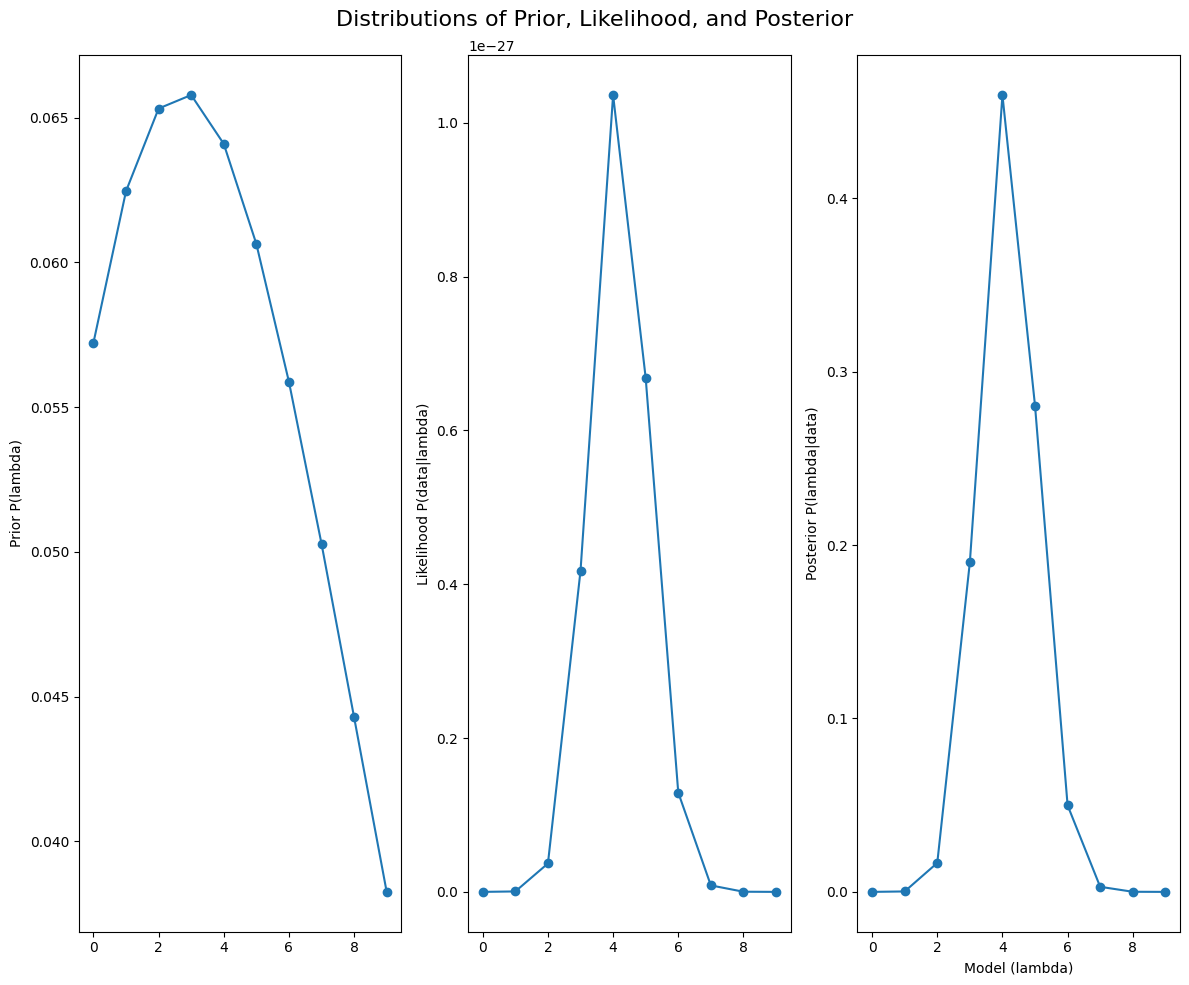

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 10), sharex=True)

distributions = ['Prior P(lambda)', 'Likelihood P(data|lambda)', 'Posterior P(lambda|data)']
for i, distribution in enumerate(distributions):
    axs[i].plot(result_df.columns, result_df.loc[distribution], marker='o')
    axs[i].set_ylabel(distribution)
    axs[i].grid(False)

axs[-1].set_xlabel('Model (lambda)')
fig.suptitle('Distributions of Prior, Likelihood, and Posterior', fontsize=16)


plt.tight_layout()
plt.show()

In [19]:
result_df_cumsum = result_df.loc["Posterior P(lambda|data)"].cumsum()
lower_bound = result_df.loc["Model (lambda)"][result_df_cumsum < 0.025].max()
upper_bound = result_df.loc["Model (lambda)"][result_df_cumsum > 0.975].min()
print(f"95% Credible Interval for lambda: ({lower_bound}, {upper_bound})")

95% Credible Interval for lambda: (17.0, 22.0)


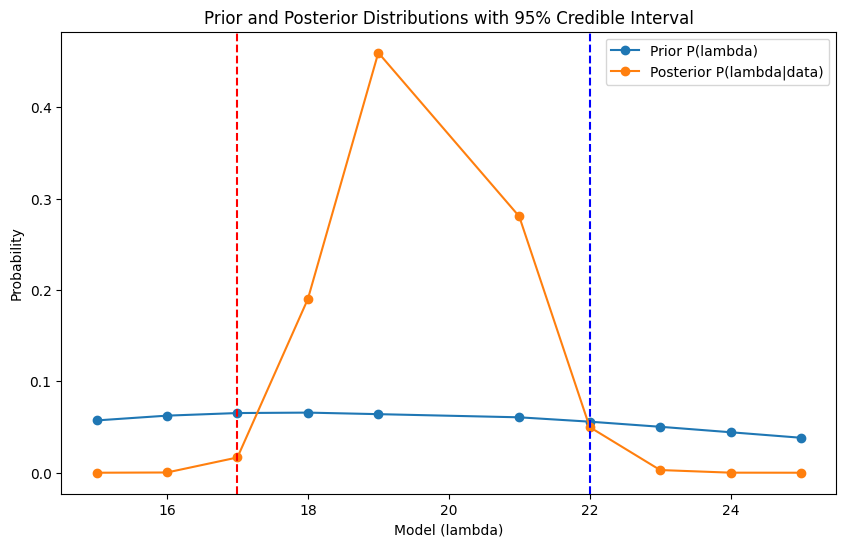

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(result_df.loc["Model (lambda)"], result_df.loc["Prior P(lambda)"], marker='o', label='Prior P(lambda)')

plt.plot(result_df.loc["Model (lambda)"], result_df.loc["Posterior P(lambda|data)"], marker='o', label='Posterior P(lambda|data)')

plt.axvline(x=lower_bound, color='r', linestyle='--')
plt.axvline(x=upper_bound, color='b', linestyle='--')

plt.xlabel('Model (lambda)')
plt.ylabel('Probability')
plt.title('Prior and Posterior Distributions with 95% Credible Interval')
plt.legend()
plt.grid(False)
plt.show()

**We are 95% confident that the true value of λ falls between approximately 17.22 and 21.67** 

## 4.3 Conjugate Distributions Approach

In [24]:
sum_x = np.sum(samples['Data'])
n = len(samples)
alpha_posterior = alpha_prior + sum_x
beta_posterior = beta_prior + n
posterior_conjugate = gamma(alpha_posterior, scale=1/beta_posterior)
print(f"Posterior parameters (alpha, beta): ({alpha_posterior}, {beta_posterior})")

Posterior parameters (alpha, beta): (422, 21.5)


In [25]:
posterior_conjugate = gamma(alpha_posterior, scale=1/beta_posterior)
credible_interval = posterior_conjugate.interval(0.95)
print(f"95% Credible Interval for lambda: {credible_interval}")

95% Credible Interval for lambda: (17.799652402453876, 21.544253777070058)


# 8.In the case of the Conjugate distribution approach use interactive visualization

In [29]:
from ipywidgets import interact, FloatSlider, IntSlider

def prior_distribution(alpha, beta, lambda_vals):
    return gamma(alpha, scale=1/beta).pdf(lambda_vals)

def likelihood_function(data, lambda_val):
    return np.prod(poisson.pmf(data, mu=lambda_val))

def posterior_distribution(data, alpha_prior, beta_prior, lambda_vals):
    sum_data = np.sum(data)
    n = len(data)
    alpha_posterior = alpha_prior + sum_data
    beta_posterior = beta_prior + n
    return gamma(alpha_posterior, scale=1/beta_posterior).pdf(lambda_vals)

def plot_distributions(alpha_prior, beta_prior, credible_interval, lambda_min, lambda_max):
    num_lambda_vals = 500
    lambda_values = np.linspace(lambda_min, lambda_max, num_lambda_vals)

    samples = pd.DataFrame(columns=['Data'], data=[20, 26, 22, 23, 18, 15, 17, 21, 12, 12, 23, 19, 26, 22, 13, 27, 24, 15, 20, 14, 23])

    prior_vals = prior_distribution(alpha_prior, beta_prior, lambda_values)
    posterior_vals = posterior_distribution(samples['Data'], alpha_prior, beta_prior, lambda_values)

    cumulative_posterior = np.cumsum(posterior_vals) / np.sum(posterior_vals)
    lower_credible_bound = lambda_values[np.argmax(cumulative_posterior >= (1 - credible_interval) / 2)]
    upper_credible_bound = lambda_values[np.argmax(cumulative_posterior >= (1 + credible_interval) / 2)]

    plt.figure(figsize=(12, 6))

    # Plot prior distribution
    plt.plot(lambda_values, prior_vals, label='Prior', color='blue')
    plt.fill_between(lambda_values, 0, prior_vals, color='blue', alpha=0.1)

    # Plot posterior distribution
    plt.plot(lambda_values, posterior_vals, label='Posterior', color='red')
    plt.fill_between(lambda_values, 0, posterior_vals, color='red', alpha=0.1)

   
    plt.axvline(x=lower_credible_bound, color='black', linestyle='--', label=f'{credible_interval*100}% Credible Interval')
    plt.axvline(x=upper_credible_bound, color='black', linestyle='--')

    plt.title('Prior and Posterior Distributions with Credible Interval')
    plt.xlabel('Lambda (Average Clicks per Day)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()


alpha_widget = FloatSlider(min=0.1, max=30, step=0.1, value=10, description='Alpha Prior')
beta_widget = FloatSlider(min=0.1, max=10, step=0.1, value=0.5, description='Beta Prior')
credible_interval_widget = FloatSlider(min=0.9, max=0.99, step=0.01, value=0.95, description='Credible Interval')
lambda_min_widget = FloatSlider(min=0, max=20, step=1, value=15, description='Lambda Min')
lambda_max_widget = FloatSlider(min=30, max=50, step=1, value=25, description='Lambda Max')


interact(plot_distributions,
         alpha_prior=alpha_widget,
         beta_prior=beta_widget,
         credible_interval=credible_interval_widget,
         lambda_min=lambda_min_widget,
         lambda_max=lambda_max_widget)

interactive(children=(FloatSlider(value=10.0, description='Alpha Prior', max=30.0, min=0.1), FloatSlider(value…

<function __main__.plot_distributions(alpha_prior, beta_prior, credible_interval, lambda_min, lambda_max)>